<a href="https://colab.research.google.com/github/arghac14/ComparativeAnalysis-and-Prediction-of-CropProductions/blob/master/Predictions/Pali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [93]:
from google.colab import files
uploaded = files.upload()

Saving Pali.xlsx to Pali.xlsx


In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Pali.xlsx']))

In [0]:
df.columns = [''] * len(df.columns)
df.columns = ['Year', 'Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','TGM(Tonnes)','Irrigated_area(hec)','Yield']

In [97]:
df

,Year,Rainfall(mm),Area(hec),Seed_distribution,SRR%,Fertilizer_consumption(kg/hec),TGM(Tonnes),Irrigated_area(hec),Yield
0,2007-08,611.8,70000,24726,35.32,52.25,20,66947,1900
1,2008-09,239.0,30000,11295,37.65,52.25,15,29452,1692
2,2009-10,146.0,22000,13000,59.09,17.57,4,24342,1980
3,2010-11,683.3,80115,18024,22.50,30.94,18,66525,1813
4,2011-12,529.0,48464,10273,21.20,59.04,5,47922,2210
5,2012-13,506.6,57098,10121,17.73,66.82,14,54649,2531
6,2013-14,543.1,47446,10014,21.11,32.00,20,46111,2735
7,2014-15,511.2,49626,7719,15.49,42.33,18,48411,2006
8,2015-16,541.4,61193,12364,20.20,39.10,17,59660,2574
9,2016-17,916.7,52182,15937,30.54,37.33,24,81994,273


## Showing correlation between dependent and independent variables

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

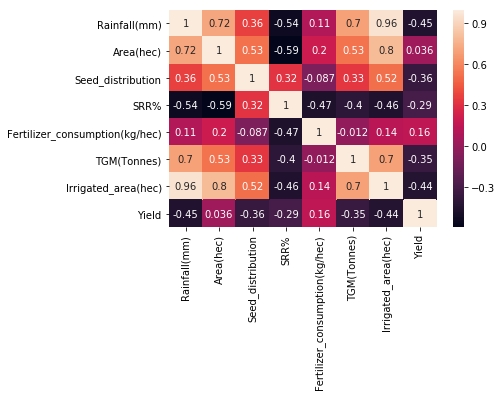

In [99]:
sb.heatmap(df.corr(),annot=True)

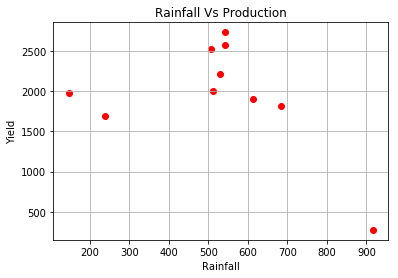

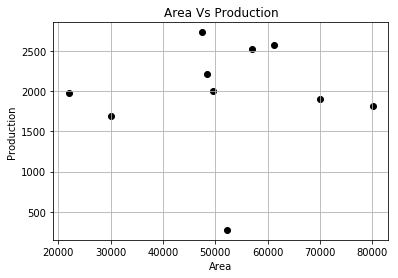

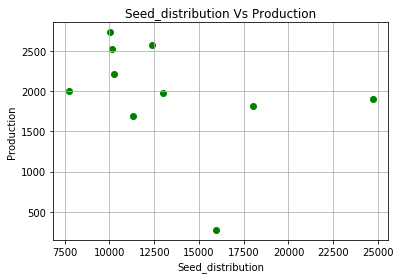

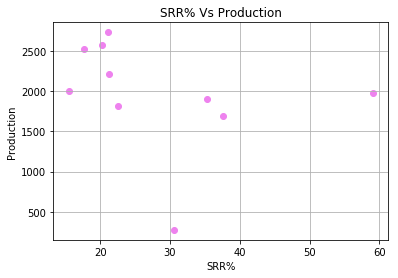

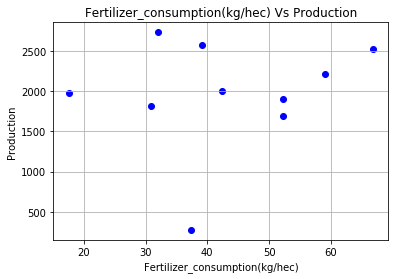

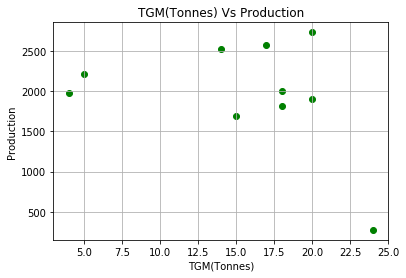

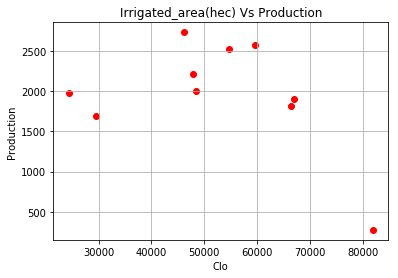

In [100]:
plt.scatter(df['Rainfall(mm)'],df['Yield'],color='red')
plt.title("Rainfall Vs Production")
plt.xlabel("Rainfall")
plt.ylabel("Yield")
plt.grid()
plt.show()
plt.scatter(df['Area(hec)'],df['Yield'],color='black')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

plt.scatter(df['Seed_distribution'],df['Yield'],color='green')
plt.title("Seed_distribution Vs Production")
plt.xlabel("Seed_distribution")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['SRR%'],df['Yield'],color='violet')
plt.title("SRR% Vs Production")
plt.xlabel("SRR%")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['Fertilizer_consumption(kg/hec)'],df['Yield'],color='blue')
plt.title("Fertilizer_consumption(kg/hec) Vs Production")
plt.xlabel("Fertilizer_consumption(kg/hec)")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['TGM(Tonnes)'],df['Yield'],color='green')
plt.title("TGM(Tonnes) Vs Production")
plt.xlabel("TGM(Tonnes)")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['Irrigated_area(hec)'],df['Yield'],color='red')
plt.title("Irrigated_area(hec) Vs Production")
plt.xlabel("Clo")
plt.ylabel("Production")
plt.grid()
plt.show()


## Multivariate Linear Regression

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [102]:
X = df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'TGM(Tonnes)','Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']] 
Y = df['Yield']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')



Predicted Production: [ 6934.45222286 17715.85504865] 


Coefficients:  [ 1.94275035e+01 -9.82440828e-03 -1.05517537e+00  5.73409255e+02
  9.67623519e+01  3.79868948e+01  2.23568347e-01] 


R-squared score:  -224.68073299389738 




## Regression (Predicting Production for each District without taking that District as training data) :


In [103]:
error=[]
n=len(df['Yield'])
for i in range(n):
  A_test=df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%','TGM(Tonnes)','Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']].iloc[df.index==i]
  b_test=df.iloc[df.index==i]['Yield']
  A_train=df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%','TGM(Tonnes)', 'Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']].drop([i],axis=0)
  b_train=df.drop([i])['Yield']

  reg=linear_model.LinearRegression()
  reg.fit(A_train,b_train)
  # prediction
  b_pred=reg.predict(A_test)
  print('~ District:',df.at[i,'Year'],'-\n','Predicted Production:',b_pred,', ','Actual Production:',[df.loc[i,'Yield']],', ','Error: ',b_pred-df.loc[i,'Yield'])
  error.append(float(b_pred-df.loc[i,'Yield']))
  

~ District: 2007-08 -
 Predicted Production: [671.67087125] ,  Actual Production: [1900] ,  Error:  [-1228.32912875]
~ District: 2008-09 -
 Predicted Production: [2801.59834303] ,  Actual Production: [1692] ,  Error:  [1109.59834303]
~ District: 2009-10 -
 Predicted Production: [-97.09526921] ,  Actual Production: [1980] ,  Error:  [-2077.09526921]
~ District: 2010-11 -
 Predicted Production: [4371.74764455] ,  Actual Production: [1813] ,  Error:  [2558.74764455]
~ District: 2011-12 -
 Predicted Production: [5563.05630975] ,  Actual Production: [2210] ,  Error:  [3353.05630975]
~ District: 2012-13 -
 Predicted Production: [556.71266184] ,  Actual Production: [2531] ,  Error:  [-1974.28733816]
~ District: 2013-14 -
 Predicted Production: [1132.0647955] ,  Actual Production: [2735] ,  Error:  [-1602.9352045]
~ District: 2014-15 -
 Predicted Production: [2725.8829147] ,  Actual Production: [2006] ,  Error:  [719.8829147]
~ District: 2015-16 -
 Predicted Production: [2275.12200871] ,  Actu

**Mean Squared Error:**

In [104]:
import math
print(list(error))

total_error=0
for i in error:
  total_error=total_error+(i*i)
  
mean_squared_error=math.sqrt(total_error/(n))

print("\nMean Squared Error: ",mean_squared_error)

[-1228.3291287469192, 1109.5983430291626, -2077.0952692053106, 2558.7476445475995, 3353.056309747206, -1974.2873381637437, -1602.9352044977377, 719.8829146992111, -298.87799129332234, 7613.693957026179]

Mean Squared Error:  2998.126226709175
